# Stock portfolio performance Data Set 

There are three disadvantages of weighted scoring stock selection models. First, they cannot identify the relations between weights of stock-picking concepts and performances of portfolios. Second, they cannot systematically discover the optimal combination for weights of concepts to optimize the performances. Third, they are unable to meet various investorsâ€™ preferences. This study aims to more efficiently construct weighted scoring stock selection models to overcome these disadvantages. Since the weights of stock-picking concepts in a weighted scoring stock selection model can be regarded as components in a mixture, we used the simplex centroid mixture design to obtain the experimental sets of weights. These sets of weights are simulated with US stock market historical data to obtain their performances. Performance prediction models were built with the simulated performance data set and artificial neural networks. Furthermore, the optimization models to reflect investorsâ€™ preferences were built up, and the performance prediction models were employed as the kernel of the optimization models so that the optimal solutions can now be solved with optimization techniques. The empirical values of the performances of the optimal weighting combinations generated by the optimization models showed that they can meet various investorsâ€™ preferences and outperform those of S&Pâ€™s 500 not only during the training period but also during the testing period.

# Importing data and libraries 

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
data = pd.read_excel("stock.xlsx",skiprows= 1,sheet_name= [0,1,2,3])
df = pd.DataFrame()
for i in range(4):
    df = df.append(data[i])

# Exploratory data analysis

In [50]:
df.shape

(252, 19)

In [51]:
df.head()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.019516,0.013399,1.902608,0.218617,0.60,0.40,0.488229,0.609445,0.780756,0.800000,0.68,0.333333
1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.023829,0.006410,1.263287,0.128740,0.55,0.65,0.505279,0.508169,0.443776,0.414220,0.56,0.666667
2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.080282,0.026548,1.894339,0.208272,0.55,0.50,0.728484,0.800000,0.776397,0.755594,0.56,0.466667
3,4,0.0,0.0,0.0,1.0,0.0,0.0,-0.006683,0.000728,1.425454,0.155526,0.55,0.35,0.384640,0.425836,0.529253,0.529196,0.56,0.266667
4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.021999,0.004407,1.094579,0.106729,0.65,0.70,0.498046,0.479146,0.354852,0.319743,0.80,0.733333


In [52]:
df.describe()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,32.00000,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.152279,0.015071,1.086675,0.103678,0.677183,0.573214,0.542936,0.568207,0.427889,0.430264,0.537143,0.541964
std,18.22043,0.198110,0.198110,0.198110,0.198110,0.198110,0.198110,0.087330,0.025971,0.211009,0.029822,0.101214,0.181645,0.145835,0.135865,0.140281,0.146439,0.140391,0.142311
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053382,-0.032844,0.680929,0.046071,0.400000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,16.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071352,-0.006134,0.929304,0.084616,0.600000,0.400000,0.450578,0.486764,0.325702,0.319333,0.457143,0.425000
50%,32.00000,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.160895,0.011679,1.048530,0.100932,0.650000,0.600000,0.555995,0.580902,0.411967,0.399398,0.560000,0.533333
75%,48.00000,0.333000,0.333000,0.333000,0.333000,0.333000,0.333000,0.231287,0.023652,1.201698,0.120647,0.750000,0.700000,0.655166,0.671781,0.505836,0.516704,0.628571,0.650000
max,63.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300086,0.076156,1.939118,0.218617,0.900000,0.900000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 62
Data columns (total 19 columns):
ID                                         252 non-null int64
 Large B/P                                 252 non-null float64
 Large ROE                                 252 non-null float64
 Large S/P                                 252 non-null float64
 Large Return Rate in the last quarter     252 non-null float64
 Large Market Value                        252 non-null float64
 Small systematic Risk                     252 non-null float64
Annual Return                              252 non-null float64
Excess Return                              252 non-null float64
Systematic Risk                            252 non-null float64
Total Risk                                 252 non-null float64
Abs. Win Rate                              252 non-null float64
Rel. Win Rate                              252 non-null float64
Annual Return.1                            252 non-null float64
Ex

## As there are no missing values, so we don't need to do the data cleaning part.

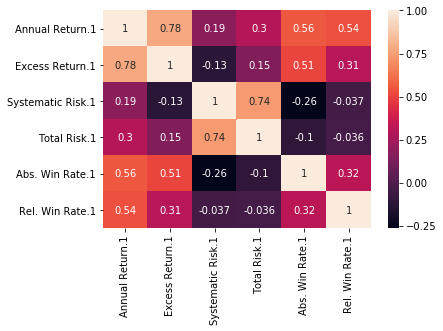

In [54]:
sns.heatmap(y.corr(),annot = True )

# Creating input features and target variables

In [55]:
x = df.iloc[:,1:13]
y = df.iloc[:,13:]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# 1.Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print(lm.intercept_) #Independent term in the linear Model

[10.44073645  4.37671021 -4.22170419  2.46811341  1.89603198 -0.41858695]


In [61]:
y_pred = lm.predict(X_test)

In [62]:
pd.DataFrame(y_pred).head()

,0,1,2,3,4,5
0,0.527067,0.557394,0.479105,0.438187,0.451386,0.485392
1,0.426489,0.460269,0.329561,0.344529,0.573562,0.468067
2,0.404716,0.523347,0.294009,0.336303,0.365135,0.440812
3,0.597566,0.555028,0.638938,0.493991,0.559788,0.541029
4,0.507611,0.542343,0.374413,0.412215,0.622579,0.574556


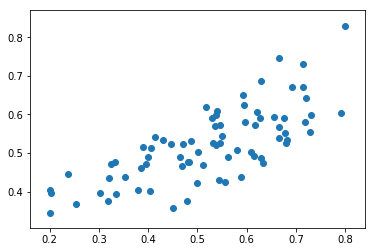

In [63]:
plt.scatter(pd.DataFrame(y_test).iloc[:,0:1],pd.DataFrame(y_pred).iloc[:,0:1])

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [65]:
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))

MAE: 0.05463345959930327


In [66]:
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))

MSE: 0.005232115746764035


In [67]:
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE: 0.07233336537701004
